# Simulación de series de datos

- Lo primero que vamos a hacer es cargar los datos de cierre del SPY
- Después calcularemos los retornos logarítmicos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
import random

!pip install yfinance > /dev/null 2>&1
import yfinance as yf

In [ ]:
msft = yf.Ticker('MSFT').history(period='max').Close.loc['2010':]
msft

Date
2010-01-04 00:00:00-05:00     23.683067
2010-01-05 00:00:00-05:00     23.690718
2010-01-06 00:00:00-05:00     23.545338
2010-01-07 00:00:00-05:00     23.300472
2010-01-08 00:00:00-05:00     23.461164
                                ...    
2022-11-28 00:00:00-05:00    241.759995
2022-11-29 00:00:00-05:00    240.330002
2022-11-30 00:00:00-05:00    255.139999
2022-12-01 00:00:00-05:00    254.690002
2022-12-02 00:00:00-05:00    255.020004
Name: Close, Length: 3253, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103

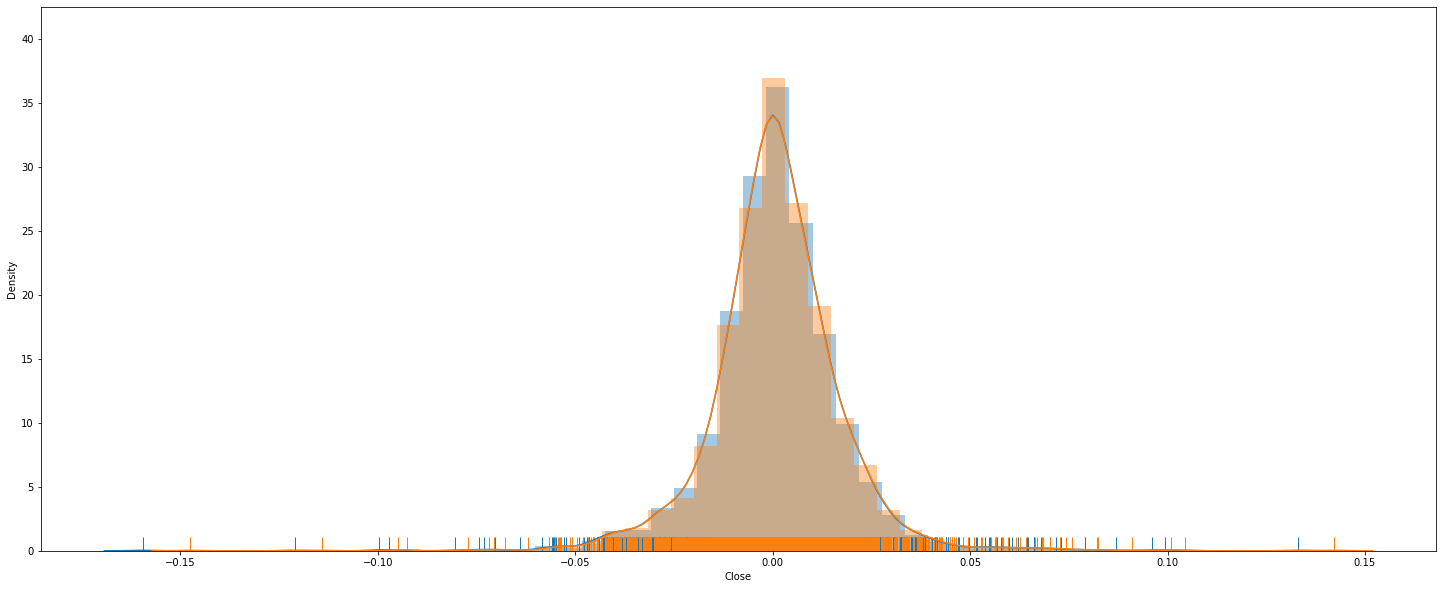

In [ ]:
msft_ret_log = np.log(msft).diff()
msft_ret = msft.pct_change()
fig = plt.figure(figsize=(25,10))
sns.distplot(msft_ret_log, rug= True)
sns.distplot(msft_ret, rug= True)

## Montecarlo

Creamos una **FUNCIÓN** que, asumiendo **distribución NORMAL**, nos simule los retornos en base a una serie de precios determinada:

In [ ]:
def montecarlo(prices, sims=1):
  media = prices.mean()
  desv = prices.std()
  montecarlo = pd.DataFrame()
  for i in range(sims):
    retornos_normales = pd.Series(np.random.normal(loc=media,
                                                  scale=desv,
                                                  size=len(prices)),
                                  index = prices.index)
    montecarlo = pd.concat([montecarlo, retornos_normales],
                           axis=1)
  montecarlo.columns = range(sims)
  return montecarlo

mtc = montecarlo(msft_ret_log, 200)
mtc

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2010-01-04 00:00:00-05:00,-0.002909,-0.022724,0.022851,-0.010868,0.010646,0.024507,-0.001709,0.013914,-0.010046,-0.014371,...,0.010372,0.022029,-0.012761,0.017017,-0.000143,0.025609,0.012060,-0.009351,0.010866,-0.022915
2010-01-05 00:00:00-05:00,-0.010446,0.002897,0.018519,-0.000666,0.007923,-0.000815,-0.004572,0.019456,0.002914,-0.011006,...,-0.005655,0.013266,0.015402,-0.007453,-0.023442,-0.003310,0.012241,-0.011696,0.014088,-0.009754
2010-01-06 00:00:00-05:00,-0.001492,-0.003290,-0.006870,-0.001944,-0.008667,-0.013795,0.004140,0.012133,0.007564,0.008541,...,-0.008332,-0.030067,-0.000546,0.001267,-0.010641,-0.004615,-0.022335,0.008190,-0.006564,0.014779
2010-01-07 00:00:00-05:00,-0.030195,-0.017864,0.016132,0.004698,-0.001496,0.000935,-0.007007,-0.015977,-0.005730,0.014534,...,-0.014529,-0.024970,0.019600,-0.008560,-0.007698,0.011286,0.021590,-0.012319,0.015936,-0.004677
2010-01-08 00:00:00-05:00,-0.001005,-0.002794,0.018469,-0.013638,0.008022,0.014176,-0.000192,0.014457,0.017321,0.019909,...,0.016235,0.007254,-0.005518,-0.025096,-0.008250,-0.010553,-0.021691,-0.013541,-0.018742,0.007803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-23 00:00:00-05:00,-0.010914,-0.010165,0.013558,-0.001459,0.009897,0.008910,0.003314,-0.016889,0.000978,-0.007273,...,-0.004386,0.001787,-0.009654,0.001303,0.023484,-0.018854,0.000136,-0.009618,-0.022776,-0.011144
2022-11-25 00:00:00-05:00,0.008132,-0.000399,0.002061,-0.022392,-0.017410,0.014188,0.001024,-0.010174,0.033132,0.005345,...,-0.000533,-0.034565,-0.016051,-0.023773,0.024223,-0.015619,-0.001297,-0.027847,0.003207,0.008194
2022-11-28 00:00:00-05:00,-0.012340,0.005982,-0.000840,0.023556,0.014607,-0.018687,-0.013308,-0.001494,0.012568,0.022671,...,-0.023199,0.014440,0.007641,-0.014476,0.006818,-0.018902,-0.024206,-0.017241,-0.016812,-0.002257
2022-11-29 00:00:00-05:00,-0.028366,-0.005989,0.006473,0.014385,0.006575,-0.000655,0.021567,-0.013271,-0.004249,0.004372,...,0.007953,-0.001559,0.010766,0.045317,0.005525,-0.002479,0.004502,-0.014764,0.009092,-0.007410


## Booststrapping

- En el Bootstrapping simple en vez de generar los retornos de forma aleatoria, realizamos un muestreo aleatorio de los retornos de la serie original

 Ahora generamos la simulación de bootstrapping simple con la función bootstrapping del archivo funciones.py

In [ ]:
def montecarlo_boots(prices, sims=1):
  
  montecarlo_boots = pd.DataFrame()
  for i in range(sims):
    retornos_boots = pd.Series(np.random.choice(prices.dropna(),
                                              size=len(prices)),
                                  index = prices.index)
    montecarlo_boots = pd.concat([montecarlo_boots, retornos_boots],
                           axis=1)
  montecarlo_boots.columns = range(sims)

  return montecarlo_boots

mtc_boots = montecarlo_boots(msft_ret_log, 200)
mtc_boots

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2010-01-04 00:00:00-05:00,0.008253,0.020062,-0.002242,0.010214,0.003502,-0.011731,0.000000,-0.001129,-0.002018,-0.002691,...,-0.009972,-0.020937,0.022012,0.005431,0.025149,0.019472,0.004823,0.004330,-0.027024,0.000000
2010-01-05 00:00:00-05:00,-0.004793,-0.003072,-0.016535,-0.014074,-0.000166,-0.009645,-0.025621,-0.007274,-0.005026,0.014952,...,0.000000,-0.007838,-0.058396,0.002247,0.014731,-0.000574,0.023925,0.013936,-0.005429,-0.006686
2010-01-06 00:00:00-05:00,0.000769,0.005009,0.017068,-0.006816,0.000000,0.002816,-0.001977,0.013709,-0.001429,-0.009899,...,-0.009015,-0.009684,0.023766,0.004143,-0.001308,0.003552,0.003412,0.014158,0.032387,0.006691
2010-01-07 00:00:00-05:00,-0.007148,0.007747,0.018285,0.002019,-0.017996,0.025467,0.000395,0.005761,-0.016457,-0.000358,...,0.010672,-0.005894,0.009558,0.007720,-0.007530,0.031101,0.004834,0.008693,-0.010172,-0.011424
2010-01-08 00:00:00-05:00,0.004319,0.012761,0.000312,-0.006873,-0.012512,0.015050,-0.010628,-0.003825,-0.006975,0.011952,...,0.009545,0.005441,-0.022250,0.000918,0.019023,0.004786,0.004143,0.022006,-0.029579,0.004814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-23 00:00:00-05:00,0.000736,0.010162,-0.002716,-0.014688,0.002571,-0.012779,-0.046599,0.007887,0.007279,-0.006097,...,0.004347,0.005629,0.000000,-0.020219,-0.007267,0.016438,-0.003860,0.021187,0.016438,0.007868
2022-11-25 00:00:00-05:00,0.010162,0.022627,0.002613,-0.024441,-0.005341,0.011774,-0.003512,0.001951,0.022778,0.005769,...,0.015415,-0.017522,-0.010628,-0.018749,-0.012084,0.007224,0.013584,0.037143,-0.006137,-0.002143
2022-11-28 00:00:00-05:00,-0.007351,-0.013355,0.020812,-0.010199,-0.002637,0.023531,-0.015487,0.003766,0.002742,0.000732,...,0.001321,-0.006706,-0.047048,0.008943,0.002737,0.014007,-0.012643,-0.001270,-0.007640,0.011815
2022-11-29 00:00:00-05:00,-0.001270,0.003509,-0.008086,-0.006650,-0.002463,0.002524,-0.000715,0.001655,0.002247,0.021649,...,0.020554,-0.002526,0.008424,0.008943,-0.004702,-0.008086,0.007592,0.004245,0.006273,-0.005953


## Comparación entre simulaciones

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103

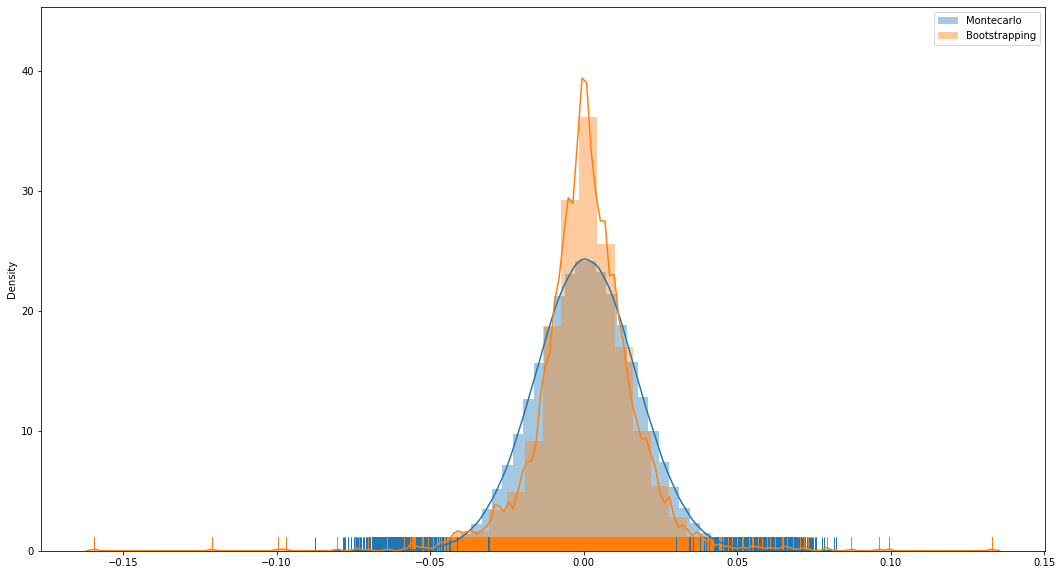

In [ ]:
fig = plt.figure(figsize=(18,10))
sns.distplot(mtc, rug= True, label='Montecarlo');
sns.distplot(mtc_boots, rug= True, label='Bootstrapping');
plt.legend()

plt.show()

### ¿Qué podemos observar?

- La simulación con montecarlo sigue una distribución uniforme, con aproximadamente la misma de cantidad de outlayers positivos que negativos.
- En la simulación con Bootstrapping por el contrario se ve la presencia de los llamados "Cisnes negros", es decir los eventos muy negativos que pueden tener un mayor impacto en nuestra operativa. Así como los outlayers de los mismos son más irregulares, pudiendo en una de las 1000 simulaciones ser notablemente mas negativo que positivo y viceversa

### Vamos a observar la evolución temporal de las simulaciones

In [ ]:
montecarlo_temp_evol = mtc.cumsum()
montecarlo_temp_evol = np.exp(montecarlo_temp_evol)
boots_temp_evol = mtc_boots.cumsum()
boots_temp_evol = np.exp(boots_temp_evol)

### Montecarlo

In [ ]:
(montecarlo_temp_evol.iloc[-1].sort_values()[::-1] <= montecarlo_temp_evol.iloc[-1].quantile(.05)).idxmax()

556

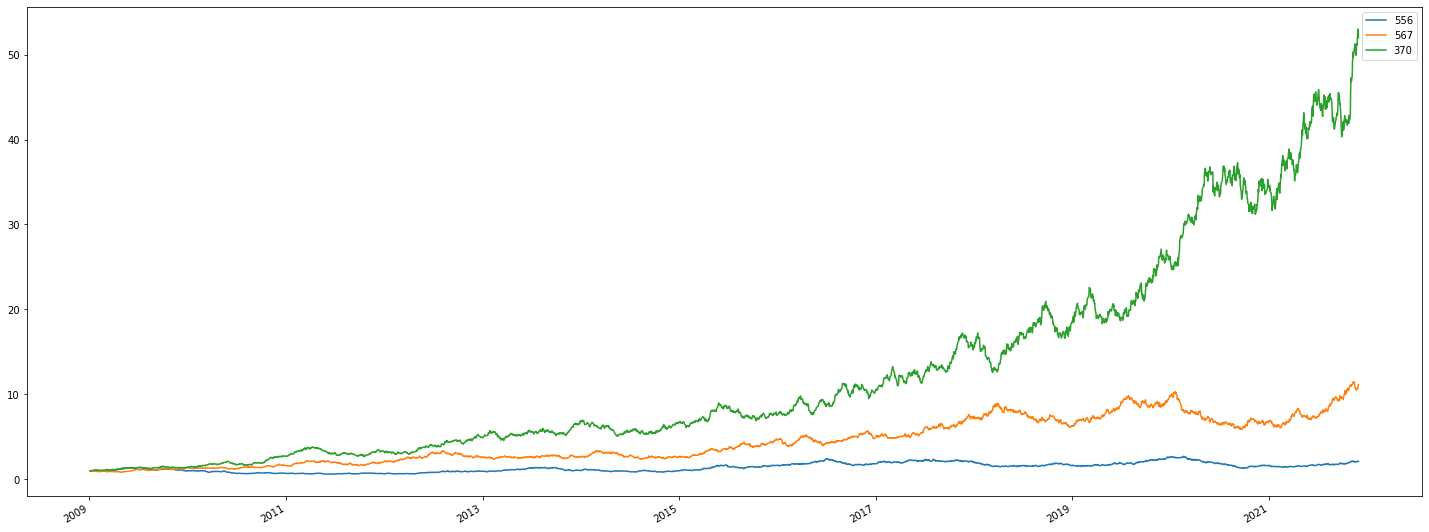

In [ ]:
mtc_q05  = (montecarlo_temp_evol.iloc[-1].sort_values()[::-1] <= montecarlo_temp_evol.iloc[-1].quantile(.05)).idxmax()
mtc_q50  = (montecarlo_temp_evol.iloc[-1].sort_values()[::-1] <= montecarlo_temp_evol.iloc[-1].quantile(.50)).idxmax()
mtc_q95  = (montecarlo_temp_evol.iloc[-1].sort_values()[::-1] <= montecarlo_temp_evol.iloc[-1].quantile(.95)).idxmax()

montecarlo_temp_evol.iloc[:,[mtc_q05,mtc_q50,mtc_q95]].plot(figsize=(25,10))

### Bootstrapping

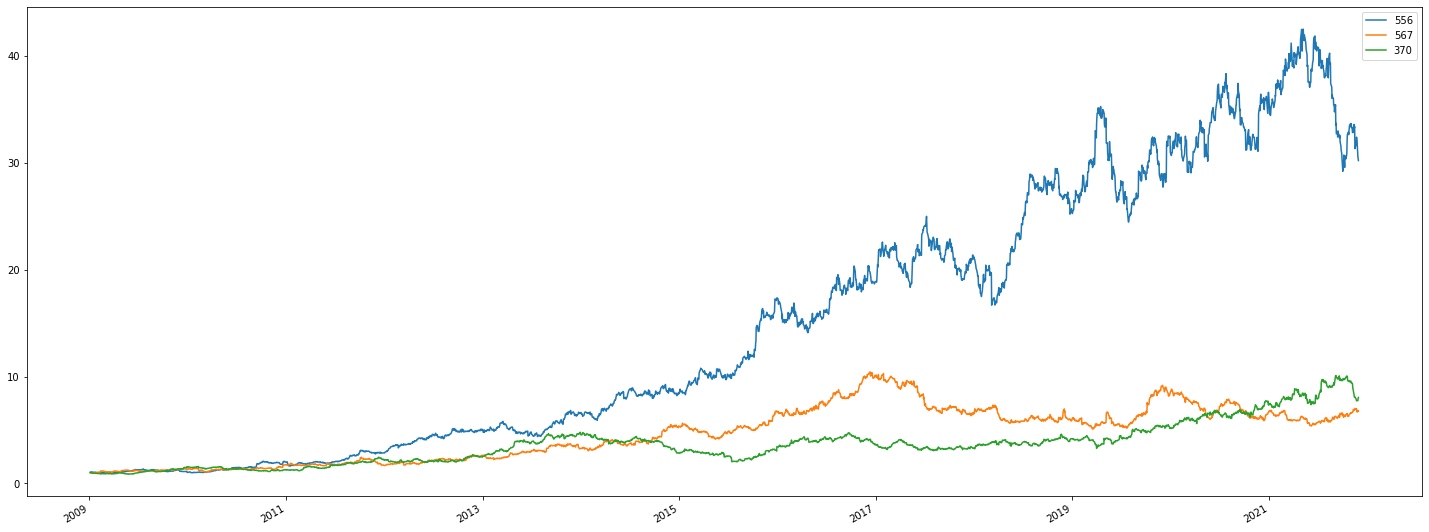

In [ ]:
mtc_boots_q05  = (boots_temp_evol.iloc[-1].sort_values()[::-1] <= boots_temp_evol.iloc[-1].quantile(.05)).idxmax()
mtc_boots_q50  = (boots_temp_evol.iloc[-1].sort_values()[::-1] <= boots_temp_evol.iloc[-1].quantile(.50)).idxmax()
mtc_boots_q95  = (boots_temp_evol.iloc[-1].sort_values()[::-1] <= boots_temp_evol.iloc[-1].quantile(.95)).idxmax()

boots_temp_evol.iloc[:,[mtc_q05,mtc_q50,mtc_q95]].plot(figsize=(25,10))